In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

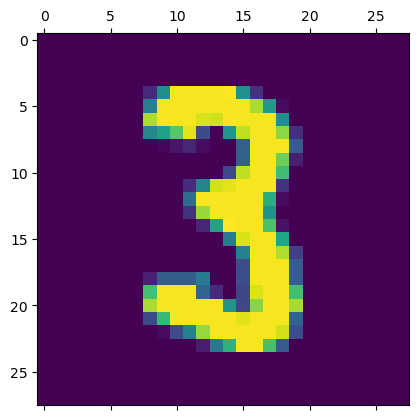

In [30]:
plt.matshow(X_train[4400])

In [31]:
y_train[4400]

3

In [32]:
X_train = X_train/255.0
X_test = X_test/255.0

In [33]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
x_test_flattened = X_test.reshape(len(X_test),28*28)

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation= "sigmoid")
])

In [37]:
model.compile(optimizer="adam",
             loss= "sparse_categorical_crossentropy",
             metrics= ["accuracy"])

In [38]:
model.fit(X_train,y_train,epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.2712 - accuracy: 0.9225 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.1196 - accuracy: 0.9647 - 5s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.0843 - accuracy: 0.9755 - 5s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.0644 - accuracy: 0.9801 - 5s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.0517 - accuracy: 0.9843 - 5s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.0419 - accuracy: 0.9870 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.0335 - accuracy: 0.9897 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.0279 - accuracy: 0.9913 - 5s/epoch - 3ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.0239 - accuracy: 0.9926 - 5s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 5s - loss: 0.0198 - accuracy: 0.9939 - 5s/epoch - 2ms/step


In [47]:
model.evaluate(X_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0133 - accuracy: 0.9965


[0.013264849781990051, 0.9965166449546814]

In [48]:
pred = model.predict(X_test)
pred[0]

313/313 [==============================] - 1s 2ms/step


array([6.7816856e-03, 1.2358587e-03, 2.9133889e-01, 9.5000017e-01,
       1.8280543e-08, 3.5671194e-04, 9.1449095e-08, 9.9999875e-01,
       4.2681918e-03, 3.2117974e-03], dtype=float32)

In [45]:
np.argmax(pred[0])

7

In [52]:
pred_labels = [np.argmax(i) for i in pred]


In [53]:
pred_labels[:5]

[7, 2, 1, 0, 4]

In [55]:
np.argmax(pred_labels)

7

In [56]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    0,    1,    1,    3,    0,    4,    0],
       [   0, 1127,    3,    1,    0,    1,    2,    0,    1,    0],
       [   4,    3, 1003,    2,    3,    0,    3,    3,   10,    1],
       [   0,    0,    8,  982,    0,    9,    0,    4,    4,    3],
       [   0,    0,    3,    0,  962,    1,    5,    2,    1,    8],
       [   2,    0,    0,    4,    1,  877,    3,    2,    3,    0],
       [   2,    2,    2,    1,    2,    3,  945,    0,    1,    0],
       [   3,    4,   11,    1,    2,    0,    0,  997,    5,    5],
       [   5,    0,    1,    4,    4,    1,    3,    5,  949,    2],
       [   1,    4,    0,    5,   10,    5,    0,    4,    7,  973]])>

Text(95.72222222222221, 0.5, 'Truth')

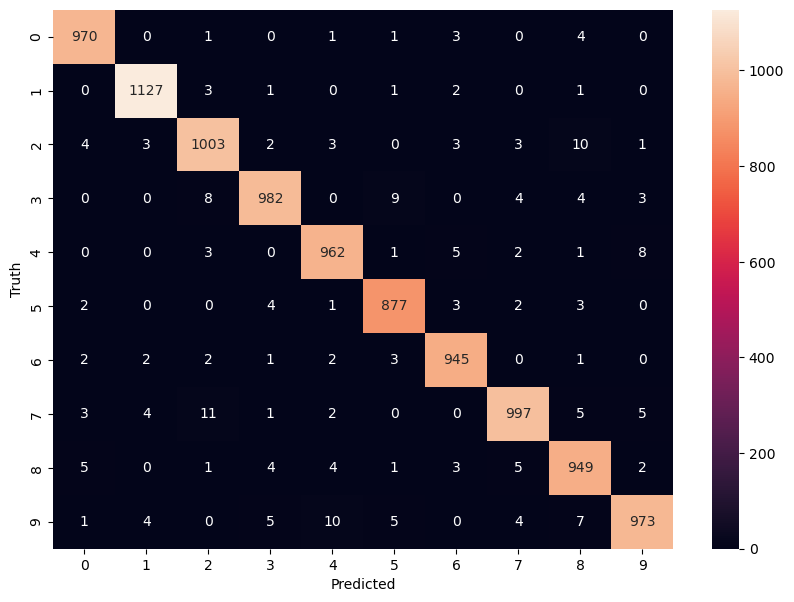

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')